In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
sb.set_style("whitegrid")
%matplotlib inline

In [6]:
#load the results
results=pd.read_csv('../results/results-final.csv')
results.describe()

,trial,train_mse,train_mae,test_mse,test_mae,runtime
count,14100.000000,1.410000e+04,1.410000e+04,1.410000e+04,1.410000e+04,14100.000000
mean,4.624184,1.011896e+06,7.518978e+01,1.597111e+08,2.033270e+02,2568.103046
std,3.036594,1.824641e+07,4.922181e+02,1.275172e+10,3.356208e+03,6192.857539
min,0.000000,7.245323e-25,6.407850e-13,1.564375e-17,2.699808e-09,0.020201
25%,2.000000,3.868574e-02,1.506396e-01,2.010092e-01,3.413062e-01,0.225688
50%,5.000000,2.974804e-01,4.199382e-01,5.395816e-01,5.672374e-01,43.243815
75%,7.000000,1.083644e+00,7.665964e-01,2.598385e+00,1.265208e+00,807.846487
max,19.000000,7.276076e+08,1.274583e+04,1.384937e+12,2.983129e+05,83110.074434


In [7]:
#inspect the results
results.head()

,dataset,algorithm,trial,best_params,train_mse,train_mae,test_mse,test_mae,runtime
0,1027_ESL,adaboost,0.0,"[('learning_rate', 0.1), ('n_estimators', 1000)]",0.258718,0.408286,0.392492,0.470931,16.010458
1,1027_ESL,adaboost,1.0,"[('learning_rate', 0.1), ('n_estimators', 100)]",0.268454,0.409285,0.379456,0.451594,17.995114
2,1027_ESL,adaboost,2.0,"[('learning_rate', 0.01), ('n_estimators', 1000)]",0.251953,0.383733,0.465860,0.518550,18.231971
3,1027_ESL,adaboost,3.0,"[('learning_rate', 0.1), ('n_estimators', 1000)]",0.250562,0.422532,0.459418,0.501843,16.656814
4,1027_ESL,adaboost,4.0,"[('learning_rate', 0.1), ('n_estimators', 1000)]",0.264771,0.409836,0.399912,0.476119,18.782136


In [8]:
#as errors per each dataset might be different, we normalize train and test scores
results['holdout_score_train']=results.groupby(['dataset', 'algorithm'])['train_mse'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
results['holdout_score_test']=results.groupby(['dataset', 'algorithm'])['test_mse'].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
grouped_results=pd.DataFrame()

#we check up to 3 digits of precision to consider that methods performed similarly
grouped_results=results.groupby(['dataset', 'algorithm'])[['train_mse','test_mse']].median().round(3)
grouped_results['train_ranking']=grouped_results.groupby(['dataset'])['train_mse'].apply(lambda x: x.rank().astype(int))
grouped_results['test_ranking']=grouped_results.groupby(['dataset'])['test_mse'].apply(lambda x: x.rank().astype(int))
grouped_results

train_mse  test_mse  train_ranking  \
dataset             algorithm                                            
1027_ESL            adaboost            0.262     0.396              9   
                    afp                 0.268     0.292             10   
                    eplex               0.274     0.313             12   
                    eplex-1m            0.261     0.274              8   
                    gradboost           0.170     0.319              3   
...                                       ...       ...            ...   
712_chscase_geyser1 mlp                35.579    39.627              9   
                    mrgp                9.515   160.842              1   
                    rf                 36.135    36.338             10   
                    sgd-regression     37.997    41.671             14   
                    xgboost            25.630    42.887              2   

                                    test_ranking  
dataset             algorithm                     
1027_ESL            adaboost                  14  
                    afp                        8  
                    eplex                     10  
                    eplex-1m                   6  
                    gradboost                 13  
...                                          ...  
712_chscase_geyser1 mlp                        7  
                    mrgp                      15  
                    rf                         2  
                    sgd-regression            11  
                    xgboost                   13  

[1410 rows x 4 columns]

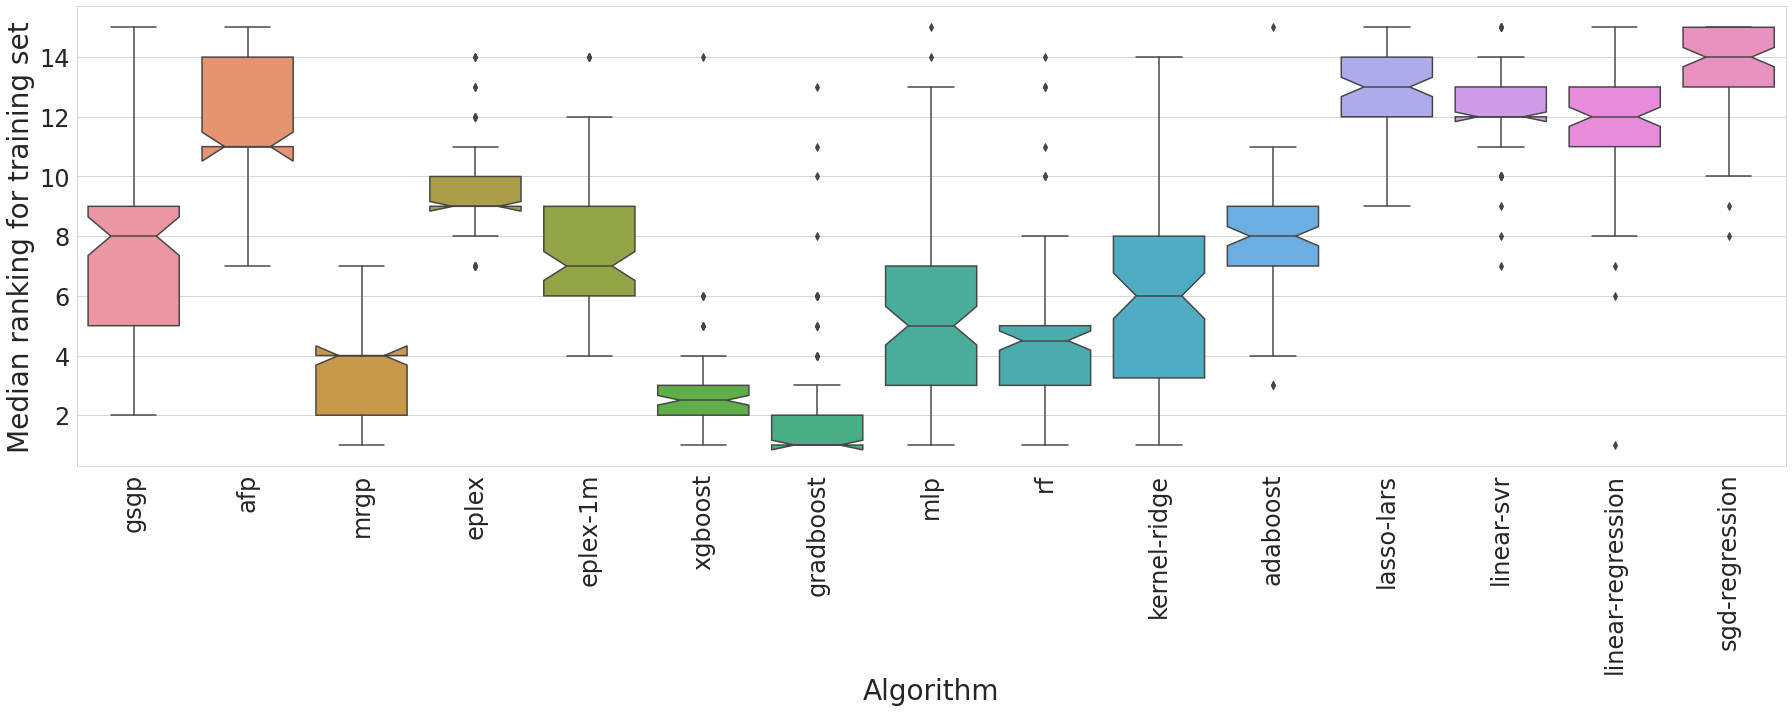

In [10]:
#we generate plot with ranking of algorithms for training data
plt.figure(figsize=(25, 10))
sb.boxplot(data=grouped_results.groupby(['dataset', 'algorithm'])['train_ranking'].median().reset_index(),
           x='algorithm', y='train_ranking', notch=True, order=['gsgp','afp','mrgp','eplex','eplex-1m','xgboost','gradboost','mlp','rf','kernel-ridge','adaboost','lasso-lars','linear-svr','linear-regression','sgd-regression'])
plt.ylabel('Median ranking for training set', fontsize=28)
plt.xlabel('Algorithm', fontsize=28)
plt.xticks(fontsize=24, rotation='vertical')
plt.yticks(fontsize=24)

plt.grid(True, axis='y') 
plt.tight_layout()

plt.savefig('training.eps')

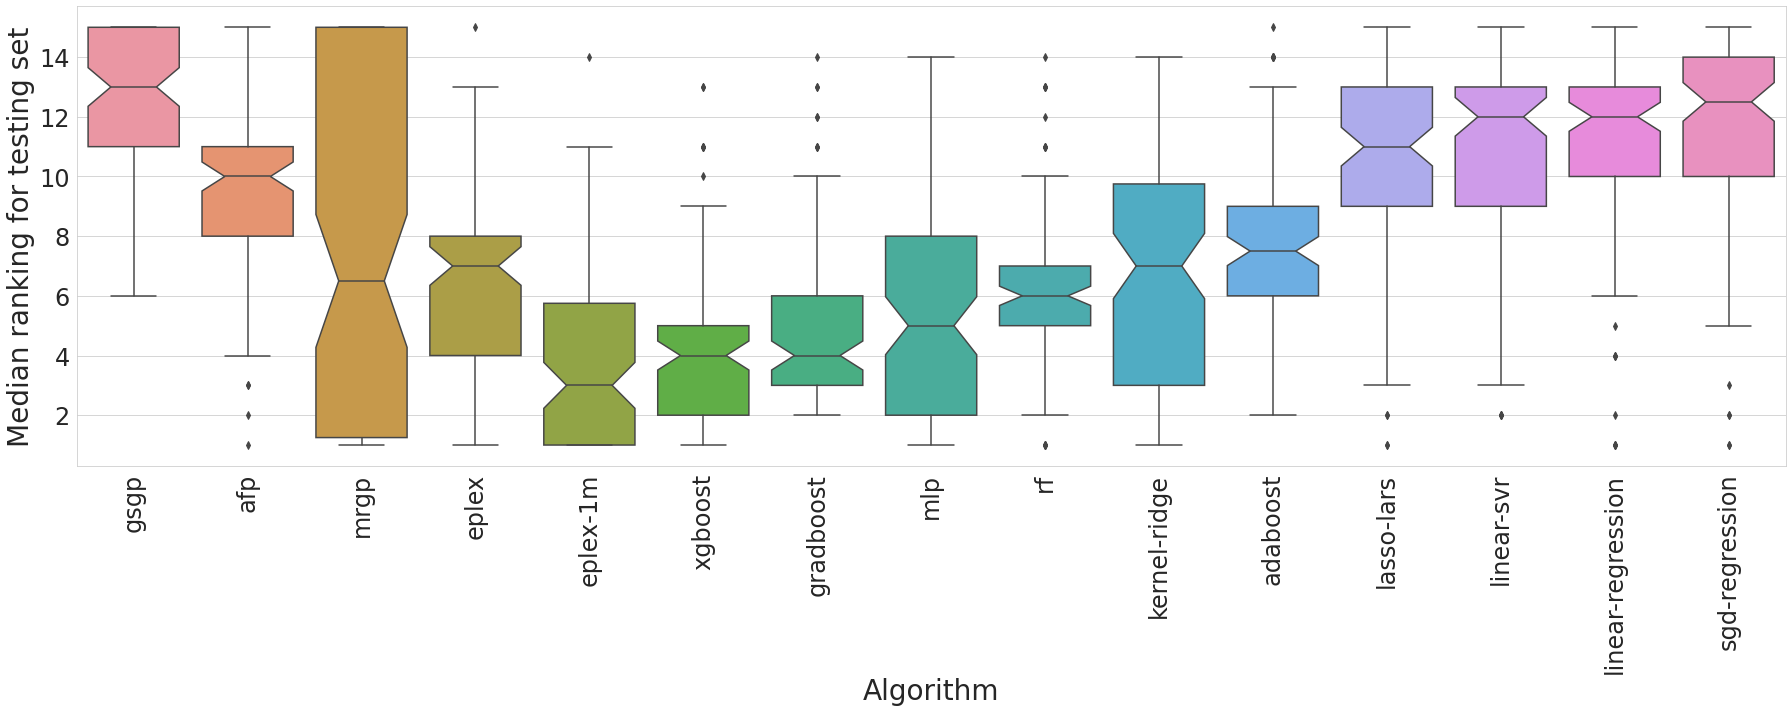

In [14]:
#we generate plot with ranking of algorithms for testing data
plt.figure(figsize=(25, 10))
sb.boxplot(data=grouped_results.groupby(['dataset', 'algorithm'])['test_ranking'].median().reset_index(),
           x='algorithm', y='test_ranking', notch=True, order=['gsgp','afp','mrgp','eplex','eplex-1m','xgboost','gradboost','mlp','rf','kernel-ridge','adaboost','lasso-lars','linear-svr','linear-regression','sgd-regression'])
plt.ylabel('Median ranking for testing set', fontsize=28)
plt.xlabel('Algorithm', fontsize=28)
plt.xticks(fontsize=24, rotation='vertical')
plt.yticks(fontsize=24)
plt.grid(True, axis='y') 
plt.tight_layout()
plt.savefig('testing.eps')
plt.savefig('testing.png')

In [ ]:
#calculating running time
a=(results[['dataset','algorithm','runtime']].groupby(['dataset','algorithm']).median().unstack())
a=a.stack().reset_index()
#runtime of each method needs to be divided by the number of all combinations of parameters
a.loc[a.algorithm=='eplex','runtime']=a[a.algorithm=='eplex'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='eplex-1m','runtime']=a[a.algorithm=='eplex-1m'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='afp','runtime']=a[a.algorithm=='afp'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='adaboost','runtime']=a[a.algorithm=='adaboost'][['runtime']].apply(lambda x : x/12)
a.loc[a.algorithm=='gradboost','runtime']=a[a.algorithm=='gradboost'][['runtime']].apply(lambda x : x/27)
a.loc[a.algorithm=='kernel-ridge','runtime']=a[a.algorithm=='kernel-ridge'][['runtime']].apply(lambda x : x/64)
a.loc[a.algorithm=='lasso-lars','runtime']=a[a.algorithm=='lasso-lars'][['runtime']].apply(lambda x : x/5)
a.loc[a.algorithm=='rf','runtime']=a[a.algorithm=='rf'][['runtime']].apply(lambda x : x/27)
a.loc[a.algorithm=='xgboost','runtime']=a[a.algorithm=='xgboost'][['runtime']].apply(lambda x : x/450)
a.loc[a.algorithm=='sgd-regression','runtime']=a[a.algorithm=='sgd-regression'][['runtime']].apply(lambda x : x/12)
a.loc[a.algorithm=='linear-svr','runtime']=a[a.algorithm=='linear-svr'][['runtime']].apply(lambda x : x/8)
a.loc[a.algorithm=='mrgp','runtime']=a[a.algorithm=='mrgp'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='gsgp','runtime']=a[a.algorithm=='gsgp'][['runtime']].apply(lambda x : x/6)
a.loc[a.algorithm=='mlp','runtime']=a[a.algorithm=='mlp'][['runtime']].apply(lambda x : x/27)



In [ ]:
plt.figure(figsize=(25, 10))
g=sb.barplot(data=a,
           x='algorithm', y='runtime', order=['gsgp','afp','mrgp','eplex','eplex-1m','xgboost','gradboost','mlp','rf','kernel-ridge','adaboost','lasso-lars','linear-svr','linear-regression','sgd-regression'],
           palette='colorblind')
plt.ylabel('Runtime of the algorithms (in secs)', fontsize=28)
plt.xlabel('Algorithm', fontsize=28)
plt.xticks(fontsize=20, rotation='vertical')
plt.yticks(fontsize=20)
plt.grid(True, axis='y') 
plt.gca().set_yscale('log')
plt.ylim(0,10000)
plt.tight_layout()
plt.savefig('runtime.eps')

In [ ]:
df=pd.read_csv('Regression_datasets_pmlb.tsv', sep='\t')
g=sb.jointplot(x='NumberOfInstances',y='NumberOfFeatures', data=df,stat_func=None)
ax = g.ax_joint
ax.set_xlabel('Number of instances')
ax.set_ylabel('Number of features')
plt.savefig('databases.eps')